# DataCleaning

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import all dataset
sales = pd.read_csv("E:/DataSet/Data spark/Sales.csv")
products = pd.read_csv("E:/DataSet/Data spark/Products.csv")
stores = pd.read_csv("E:/DataSet/Data spark/Stores.csv")
exchange_rates = pd.read_csv("E:/DataSet/Data spark/Exchange_Rates.csv")
customers = pd.read_csv("E:/DataSet/Data spark/Customers.csv",encoding='unicode_escape')


In [3]:
sales.head(10)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,01-01-2016,NaN,265598,10,1304,1,CAD
1,366001,1,01-01-2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,01-01-2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,01-01-2016,01-12-2016,266019,0,1106,7,CAD
4,366002,2,01-01-2016,01-12-2016,266019,0,373,1,CAD
5,366002,3,01-01-2016,01-12-2016,266019,0,1080,4,CAD
6,366004,1,01-01-2016,NaN,1107461,38,163,6,GBP
7,366004,2,01-01-2016,NaN,1107461,38,1529,2,GBP
8,366005,1,01-01-2016,NaN,844003,33,421,4,EUR
9,366007,1,01-01-2016,NaN,2035771,43,1617,1,USD


In [4]:
sales.dtypes

Order Number      int64
Line Item         int64
Order Date       object
Delivery Date    object
CustomerKey       int64
StoreKey          int64
ProductKey        int64
Quantity          int64
Currency Code    object
dtype: object

In [9]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'],format = "mixed")  #change the datatypes
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'],format = "mixed", errors='coerce')

In [11]:
sales.dtypes

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object

In [13]:
#find null values
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [17]:
#fill null Values
sales.fillna("N/A" ,inplace=True)
sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [19]:
sales.head(5)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,N/A,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD


In [21]:
products.head(10)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
5,6,Contoso 2G MP3 Player E200 Black,Contoso,Black,$11.00,$21.57,101,MP4&MP3,1,Audio
6,7,Contoso 2G MP3 Player E200 Blue,Contoso,Blue,$11.00,$21.57,101,MP4&MP3,1,Audio
7,8,Contoso 4G MP3 Player E400 Silver,Contoso,Silver,$30.58,$59.99,101,MP4&MP3,1,Audio
8,9,Contoso 4G MP3 Player E400 Black,Contoso,Black,$30.58,$59.99,101,MP4&MP3,1,Audio
9,10,Contoso 4G MP3 Player E400 Green,Contoso,Green,$30.58,$59.99,101,MP4&MP3,1,Audio


In [23]:
products.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [25]:
products['Unit Cost USD'] = products['Unit Cost USD'].replace('[/$,]','',regex=True).astype(float) # to remove $ symbol & data type
products['Unit Price USD'] = products['Unit Price USD'].replace('[/$,]','',regex=True).astype(float)

In [27]:
products.dtypes

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object

In [29]:
#find null values
products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [31]:
products.head(2)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio


In [33]:
stores.head(10)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
5,6,Australia,Western Australia,2000.0,1/1/2010
6,7,Canada,New Brunswick,1105.0,5/7/2007
7,8,Canada,Newfoundland and Labrador,2105.0,7/2/2014
8,9,Canada,Northwest Territories,1500.0,3/4/2005
9,10,Canada,Nunavut,1210.0,4/4/2015


In [35]:
stores.dtypes

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object

In [37]:
#find null values
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [39]:
stores['Square Meters'] = pd.to_numeric(stores['Square Meters'], errors='coerce') # change data types into date format
stores['Open Date'] = pd.to_datetime(stores['Open Date'],format = 'mixed')

In [41]:
stores.dtypes

StoreKey                  int64
Country                  object
State                    object
Square Meters           float64
Open Date        datetime64[ns]
dtype: object

In [45]:
#fill null Values
stores['Open Date'] = stores['Open Date'].fillna(pd.NaT)
stores.fillna("N/A" ,inplace=True)
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [47]:
customers.head(10)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1/20/1954
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,11/22/1969
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,03-12-1950
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,12/21/1965
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,7/25/1975


In [49]:
customers.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [51]:
customers.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [53]:
customers['Birthday'] = pd.to_datetime(customers['Birthday'],format='mixed', errors='coerce')

In [55]:
customers.dtypes

CustomerKey             int64
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
dtype: object

In [57]:
#fill null Values
customers.fillna("N/A" ,inplace=True)
customers.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [61]:
customers.head(10)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1954-01-20
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,1969-11-22
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,1950-03-12
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,1965-12-21
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,1975-07-25


In [63]:
exchange_rates.head(10)

,Date,Currency,Exchange
0,01-01-2015,USD,1.0000
1,01-01-2015,CAD,1.1583
2,01-01-2015,AUD,1.2214
3,01-01-2015,EUR,0.8237
4,01-01-2015,GBP,0.6415
5,01-02-2015,USD,1.0000
6,01-02-2015,CAD,1.1682
7,01-02-2015,AUD,1.2323
8,01-02-2015,EUR,0.8304
9,01-02-2015,GBP,0.6477


In [65]:
exchange_rates.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [67]:
exchange_rates.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [69]:
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'],format = 'mixed')

In [71]:
exchange_rates.dtypes

Date        datetime64[ns]
Currency            object
Exchange           float64
dtype: object

# Merge Datasets

In [74]:
df = pd.merge(sales, products, on='ProductKey', how='left')

In [76]:
df = pd.merge(df, stores, on='StoreKey', how='left')

In [78]:
df = pd.merge(df, customers, on=('CustomerKey','Country','State'), how='left')

In [80]:
df.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Country',
       'State', 'Square Meters', 'Open Date', 'Gender', 'Name', 'City',
       'State Code', 'Zip Code', 'Continent', 'Birthday'],
      dtype='object')

In [82]:
df.shape

(62884, 29)

In [84]:
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State,Square Meters,Open Date,Gender,Name,City,State Code,Zip Code,Continent,Birthday
0,366000,1,2016-01-01,N/A,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,...,Nunavut,1210.0,2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,N/A,1216913,43,632,3,USD,WWI Screen 85in E1010 White,...,Alaska,1190.0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62880,2243031,1,2021-02-20,2021-02-24 00:00:00,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62881,2243032,1,2021-02-20,2021-02-23 00:00:00,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62882,2243032,2,2021-02-20,2021-02-23 00:00:00,331277,0,1717,2,CAD,MGS Flight Simulator X M250,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# Find outlayers Using IQR Method

In [99]:
df.describe()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Unit Cost USD,Unit Price USD,SubcategoryKey,CategoryKey,Open Date,Birthday
count,6.288400e+04,62884.000000,62884,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884,6181
mean,1.430905e+06,2.164207,2018-11-30 21:21:56.939126016,1.180797e+06,31.802144,1125.859344,3.144790,116.253013,280.569848,450.198238,4.469611,2011-05-30 02:16:19.174352896,1969-01-24 20:30:05.533085260
min,3.660000e+05,1.000000,2016-01-01 00:00:00,3.010000e+02,0.000000,1.000000,1.000000,0.480000,0.950000,101.000000,1.000000,2005-03-04 00:00:00,1935-02-06 00:00:00
25%,1.121017e+06,1.000000,2018-01-25 00:00:00,6.808580e+05,8.000000,437.000000,1.000000,22.050000,47.950000,303.000000,3.000000,2010-01-01 00:00:00,1952-06-16 00:00:00
50%,1.498016e+06,2.000000,2019-02-06 00:00:00,1.261200e+06,37.000000,1358.000000,2.000000,79.530000,181.000000,501.000000,5.000000,2010-01-01 00:00:00,1968-07-01 00:00:00
75%,1.788010e+06,3.000000,2019-11-23 00:00:00,1.686496e+06,53.000000,1650.000000,4.000000,138.420000,300.000000,602.000000,6.000000,2013-06-07 00:00:00,1986-04-21 00:00:00
max,2.243032e+06,7.000000,2021-02-20 00:00:00,2.099937e+06,66.000000,2517.000000,10.000000,1060.220000,3199.990000,808.000000,8.000000,2019-03-05 00:00:00,2002-01-29 00:00:00
std,4.532963e+05,1.365170,NaN,5.859634e+05,22.978188,709.244010,2.256371,140.033327,382.827515,212.710652,2.132682,NaN,NaN


<Axes: ylabel='Unit Price USD'>

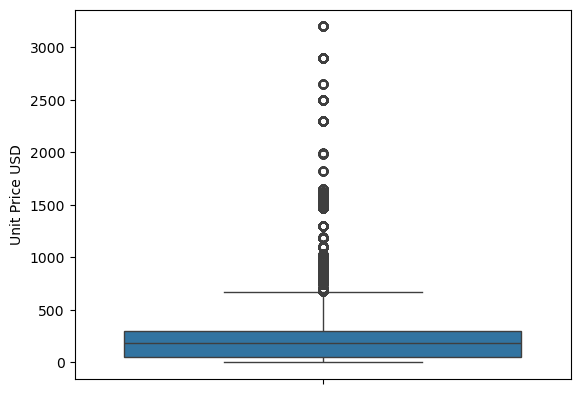

In [95]:
sns.boxplot(df['Unit Price USD'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23400\2151077248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Unit Price USD'])


<Axes: xlabel='Unit Price USD', ylabel='Density'>

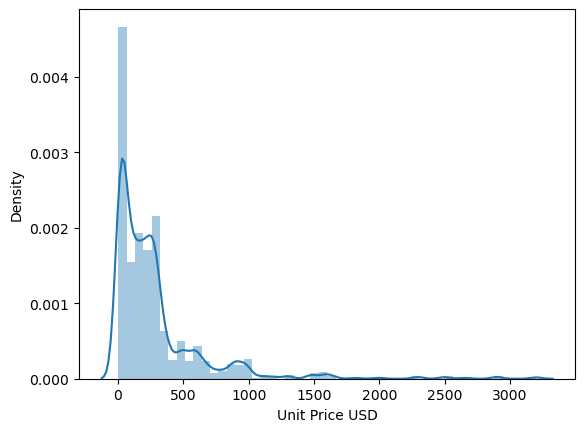

In [97]:
sns.distplot(df['Unit Price USD'])

In [101]:
Q1 = df['Unit Price USD'].quantile(0.25)
Q3 = df['Unit Price USD'].quantile(0.75)
IQR = Q3 - Q1

In [103]:
Q1 , Q3 , IQR

(47.95, 300.0, 252.05)

In [105]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(-330.12500000000006, 678.075)

In [107]:
# find outlayers
df.loc[(df['Unit Price USD']>= upper_limit) | (df['Unit Price USD']<= lower_limit)]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State,Square Meters,Open Date,Gender,Name,City,State Code,Zip Code,Continent,Birthday
6,366004,1,2016-01-01,N/A,1107461,38,163,6,GBP,"Adventure Works 52"" LCD HDTV X790W White",...,Belfast,1800.0,2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaT
11,366008,1,2016-01-01,N/A,759705,29,1154,9,EUR,"Fabrikam Trendsetter 1/3"" 8.5mm X200 Blue",...,Enna,1000.0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
27,367000,1,2016-01-02,N/A,1438050,56,1176,1,USD,Fabrikam Trendsetter 1'' 25mm X400 White,...,New Hampshire,1260.0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
32,367005,2,2016-01-02,2016-01-10 00:00:00,758280,0,319,2,EUR,SV Car Video LCD9.2W X9281 Silver,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
41,367008,1,2016-01-02,N/A,763246,28,1951,3,EUR,Litware Refrigerator 24.7CuFt X980 Silver,...,Caltanissetta,1200.0,2012-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62811,2243001,3,2021-02-20,2021-02-24 00:00:00,1129799,0,438,4,GBP,WWI Desktop PC2.33 X2330 Silver,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62829,2243006,1,2021-02-20,N/A,1965288,55,1981,3,USD,Litware Refrigerator 19CuFt M760 Red,...,Nevada,2000.0,2009-12-15,Female,Tilde Villadsen,Las Vegas,NV,89108,North America,1999-12-08
62861,2243022,2,2021-02-20,N/A,1951832,54,2106,1,USD,Contoso Water Heater 4.3GPM M1250 Grey,...,Nebraska,2000.0,2013-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaT
62864,2243023,3,2021-02-20,N/A,2089265,45,340,1,USD,Fabrikam Laptop17 M7000 Black,...,Connecticut,2000.0,2007-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [115]:
# Capping - change the outlayer value to uppoerlimit to lower limit
df['Unit Price USD'] = df['Unit Price USD'].astype(float)
Final_df = df.copy()
Final_df.loc[(df['Unit Price USD']>= upper_limit), 'Unit Price USD'] = upper_limit
Final_df.loc[(df['Unit Price USD']<= lower_limit), 'Unit Price USD'] = lower_limit

<Axes: ylabel='Unit Price USD'>

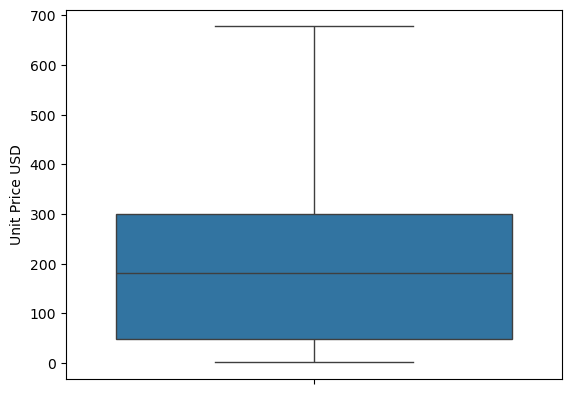

In [117]:
sns.boxplot(Final_df['Unit Price USD'])

In [119]:
Final_df.shape

(62884, 29)

In [121]:
Final_df.head(5)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State,Square Meters,Open Date,Gender,Name,City,State Code,Zip Code,Continent,Birthday
0,366000,1,2016-01-01,N/A,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,...,Nunavut,1210.0,2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,Online,N/A,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [123]:
Final_df.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Country',
       'State', 'Square Meters', 'Open Date', 'Gender', 'Name', 'City',
       'State Code', 'Zip Code', 'Continent', 'Birthday'],
      dtype='object')

In [125]:
#drop unwanted columns:

Final_df.drop(['Name','Order Number', 'Delivery Date','State Code','Zip Code','Open Date'], axis=1, inplace = True)

In [127]:
Final_df

,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,...,Subcategory,CategoryKey,Category,Country,State,Square Meters,Gender,City,Continent,Birthday
0,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,NaN,NaN,NaN,NaT
1,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,...,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,N/A,NaN,NaN,NaN,NaT
2,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,...,Microwaves,8,Home Appliances,Online,Online,N/A,NaN,NaN,NaN,NaT
3,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,...,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,N/A,NaN,NaN,NaN,NaT
4,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,...,Laptops,3,Computers,Online,Online,N/A,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,White,...,Projectors & Screens,3,Computers,United States,Alaska,1190.0,NaN,NaN,NaN,NaT
62880,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,...,Bluetooth Headphones,1,Audio,Online,Online,N/A,NaN,NaN,NaN,NaT
62881,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,...,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,N/A,NaN,NaN,NaN,NaT
62882,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,Pink,...,Download Games,7,Games and Toys,Online,Online,N/A,NaN,NaN,NaN,NaT


In [129]:
Final_df.columns

Index(['Line Item', 'Order Date', 'CustomerKey', 'StoreKey', 'ProductKey',
       'Quantity', 'Currency Code', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category', 'Country', 'State', 'Square Meters',
       'Gender', 'City', 'Continent', 'Birthday'],
      dtype='object')

In [131]:
#find null values
Final_df.isnull().sum()

Line Item             0
Order Date            0
CustomerKey           0
StoreKey              0
ProductKey            0
Quantity              0
Currency Code         0
Product Name          0
Brand                 0
Color                 0
Unit Cost USD         0
Unit Price USD        0
SubcategoryKey        0
Subcategory           0
CategoryKey           0
Category              0
Country               0
State                 0
Square Meters         0
Gender            56703
City              56703
Continent         56703
Birthday          56703
dtype: int64

In [157]:
Final_df.fillna("N/A" ,inplace=True)
Final_df.isnull().sum()

Line Item         0
Order Date        0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Country           0
State             0
Square Meters     0
Gender            0
City              0
Continent         0
Birthday          0
dtype: int64

In [139]:
Final_df.to_csv("Final_df.csv", index=False)
Final_df

,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,...,Subcategory,CategoryKey,Category,Country,State,Square Meters,Gender,City,Continent,Birthday
0,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,N/A,N/A,N/A,N/A
1,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,...,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,N/A,N/A,N/A,N/A,N/A
2,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,...,Microwaves,8,Home Appliances,Online,Online,N/A,N/A,N/A,N/A,N/A
3,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,...,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,N/A,N/A,N/A,N/A,N/A
4,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,...,Laptops,3,Computers,Online,Online,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,White,...,Projectors & Screens,3,Computers,United States,Alaska,1190.0,N/A,N/A,N/A,N/A
62880,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,...,Bluetooth Headphones,1,Audio,Online,Online,N/A,N/A,N/A,N/A,N/A
62881,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,...,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,N/A,N/A,N/A,N/A,N/A
62882,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,Pink,...,Download Games,7,Games and Toys,Online,Online,N/A,N/A,N/A,N/A,N/A


# To connect sql to insert datasets

In [ ]:
! pip3 install mysql-connector-python

In [141]:
import mysql.connector

In [143]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
)

In [145]:
print(mydb)
mycursor = mydb.cursor(buffered=True)

In [ ]:
mycursor.execute("CREATE DATABASE Data_Spark")

In [147]:
mycursor.execute("USE Data_Spark")

In [163]:
mycursor.execute('''CREATE TABLE Global_Electronics(LineItem INT, OrderDate DATETIME, CustomerKey INT,
                                                    StoreKey INT, ProductKey INT, Quantity INT,
                                                    CurrencyCode VARCHAR(10), ProductName VARCHAR(100), Brand VARCHAR(25),
                                                    Color VARCHAR(50), UnitCostUSD FLOAT, UnitPriceUSD FLOAT,
                                                    SubcategoryKey INT, Subcategory VARCHAR(50), CategoryKey INT,
                                                    Category VARCHAR(100), Country VARCHAR(100), State VARCHAR(50),SquareMeters FLOAT,
                                                    Gender VARCHAR(10), City VARCHAR(50), Continent VARCHAR(50),Birthday DATETIME
                                                     )''')

In [165]:
insert_datas = '''INSERT INTO Global_Electronics (LineItem, OrderDate, CustomerKey, StoreKey,
                                               ProductKey, Quantity, CurrencyCode, ProductName, 
                                               Brand, Color, UnitCostUSD, UnitPriceUSD, SubcategoryKey,
                                               Subcategory, CategoryKey, Category, Country, State,
                                               SquareMeters,Gender, City, Continent,Birthday) 
             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

try:
    # Convert DataFrame rows to a list of tuples (for use in executemany)
    data_to_insert = list(Final_df.itertuples(index=False, name=None))

    # Insert data with error handling
    batch_size = 1000  # Insert 1000 rows at a time 
    for i in range(0, len(data_to_insert), batch_size):
        batch = data_to_insert[i:i + batch_size]
        mycursor.executemany(insert_datas, batch)  
        mydb.commit()  

    print("Data inserted successfully.")

except mysql.connector.Error as err:
    print(f"Error: {err}")
    mydb.rollback() 



Data inserted successfully.
